# **Course One | Supervised Machine Learning**
---
This is couse one of three in this specialization. This course covers supervised learning (regression, and classification).

## **Week One | Introduction To Machine Learning**
Welcome to the Machine Learning Specialization! You're joining millions of others who have taken either this or the original course, which led to the founding of Coursera, and has helped millions of other learners, like you, take a look at the exciting world of machine learning!

**Learning Objectives:**
* Define machine learning
* Define supervised learning
* Define unsupervised learning
* Write and run Python code in Jupyter Notebooks
* Define a regression model
* Implement and visualize a cost function
* Implement gradient descent
* Optimize a regression model using gradient descent

## **Overview of Machine Learning**
**Videos:**
The videos were straight forward welcome to the course, and also showed some real life applications of the subject.

## **Supervised vs. Unsupervised Machine Learning**
**Videos:**
The videos first defined **_machine learning_** as the act of making the computer do something without it being explicitly programmed to do it, i.e the machine learnes by itself, hence the name. The videos also defined the two main branches of machine learning: supervised learning and unsuprvised learning, and defined each one and gave example application of each one. **_supervised learning_** is the type of machine learning in which the imput would be labelled data, unlike the unsupervised one, were the input is unlabelled data, and the algorithm needs to find patterns in the data(cluster them, or detect the anamoly). PCA is another example of unsupervised learning, which I do not know what it is yet, but I thought mentioning it would be good here. For the **_supervised learning_** part, there is two main branches of it: Regression, where the output is continious(predict income for example), and classification, where the output is discrete(cancer type detection for example). This section introduced Jupyter notebooks as well, but I won't talk about it since I have been using it for a while now.

**Quizes:**
Very straight forward two conceptual questions quiz.

## **Regression Model**
**Videos:**
The videos covered what linear regression is, and went into great details at that. The opyinal labs were great as well. Nothing to note here as I will go through the topic from scratch in code later.

**Quizes:**
Very straight forward two conceptual questions quiz.

## **Train The Model With Gradient Descent**
**Videos:**
The videos covered what grasient descent is, and went into great details at that, and gave great intuition to understand it, and then covered how the gradient descent solves the cost function minimzation problem from the linear regression section before it. The optinal labs were great as well. Nothing to note here as I will go through the topic from scratch in code later.

**Quizes:**
Very straight forward two conceptual questions quiz.

## **implementing A linear Regression Model From Scratch | A Side Quest:**

### Problem Statement:
Here we have a dataset of the population of a ctiy vs the net profit, and we are trying to predict the profit for any population:

In [1]:
# Importing the relevant modules:

from math import ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Loading the dataset:
df = pd.read_csv('../../Datasets/bike_sharing_data.txt')

In [3]:
# Examining the dataset:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
# df.describe() # Uncomment to examine the data more
# df.info()

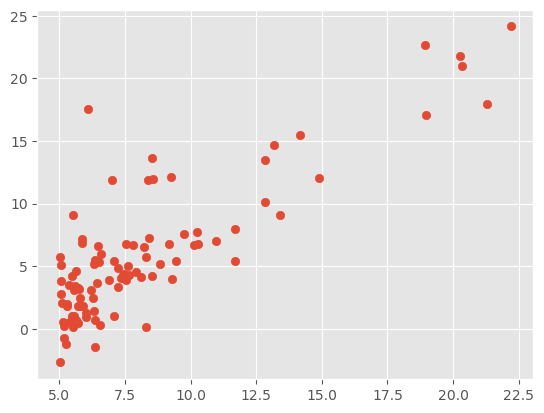

In [5]:
# Visualizing the data:
plt.scatter(df.Population, df.Profit)

* The data looks suitable for linear regression, so here I start with it:
* The optimum line will take the form  of w*x+b, where I need to optimize the w, and b values to give the best fit(minimze the error).

In [6]:
x_train = df.Population # The Feature
y_train = df.Profit     # The Target

### Computing The Cost:

In [7]:
# computing the cost function:
def cost(x,y,w,b):
    ''' This function computes the cost function ,
    Args:
    x: Feature data
    y: Target Data
    w: Parameter
    b: Parameter
    '''
    cost = 0
    m = len(x_train)
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    
    total_cost = cost / (2*m)
    
    return total_cost

### Computing The Derivitives:

In [8]:
# Computing the derivitives:
def gradients(x,y,w,b):
    ''' This function computes the cost function ,
    Args:
    x: Feature data
    y: Target Data
    w: Parameter
    b: Parameter
    '''
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
    
    return dj_dw, dj_db

### Implementing The Gradient Descent Algorithm:

In [9]:
# Implementing the gradient descent alforithm:
def gradient_descent(w,b,alpha,itr):
    ''' This function employs the gradient descent algorithm
    Args:
    w, b: parameters
    alpha: learning rate
    gradients: the derivitive of the cost w.r.t w and b, respectively
    itr: The number of iterations
    '''
    j_history = [] # Saving the cost function values history for plotting later on
    for i in range(itr):
        djdw, djdb = gradients(x_train,y_train,w,b)
        w = w - alpha * djdw
        b = b - alpha * djdb
        
        if i<100000:      # prevent resource exhaustion 
            j_history.append( cost(x_train, y_train, w , b))
            
        if i% ceil(itr/10) == 0:   # prints 10 iterations or all of them if they're < 10
            print(f"Iteration {i:4}: Cost {j_history[-1]:0.2e} ",
                  f"dj_dw: {djdw: 0.3e}, dj_db: {djdb: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b , j_history

### Putting It All Together:

In [10]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 0.01
# run gradient descent
w_final, b_final, j_hist = gradient_descent(w_init, b_init, tmp_alpha, 
                                                    iterations)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 6.74e+00  dj_dw: -6.533e+01, dj_db: -5.839e+00   w:  6.533e-01, b: 5.83914e-02
Iteration 1000: Cost 4.52e+00  dj_dw: -1.185e-02, dj_db:  1.180e-01   w:  1.127e+00, b:-3.24258e+00
Iteration 2000: Cost 4.48e+00  dj_dw: -1.951e-03, dj_db:  1.942e-02   w:  1.182e+00, b:-3.78826e+00
Iteration 3000: Cost 4.48e+00  dj_dw: -3.211e-04, dj_db:  3.196e-03   w:  1.191e+00, b:-3.87808e+00
Iteration 4000: Cost 4.48e+00  dj_dw: -5.285e-05, dj_db:  5.261e-04   w:  1.193e+00, b:-3.89287e+00
Iteration 5000: Cost 4.48e+00  dj_dw: -8.699e-06, dj_db:  8.659e-05   w:  1.193e+00, b:-3.89530e+00
Iteration 6000: Cost 4.48e+00  dj_dw: -1.432e-06, dj_db:  1.425e-05   w:  1.193e+00, b:-3.89570e+00
Iteration 7000: Cost 4.48e+00  dj_dw: -2.357e-07, dj_db:  2.346e-06   w:  1.193e+00, b:-3.89577e+00
Iteration 8000: Cost 4.48e+00  dj_dw: -3.880e-08, dj_db:  3.862e-07   w:  1.193e+00, b:-3.89578e+00
Iteration 9000: Cost 4.48e+00  dj_dw: -6.386e-09, dj_db:  6.356e-08   w:  1.193e+00, b:-3.89578e+00


### Plotting The Results:

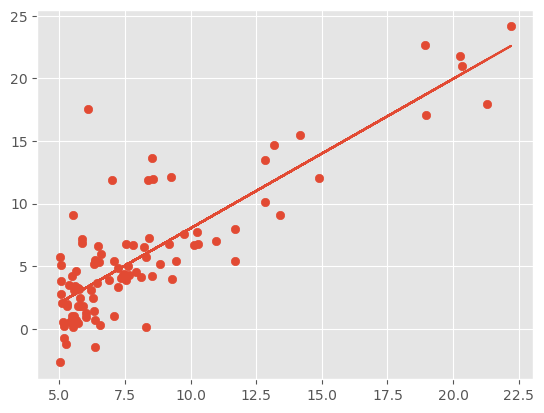

In [11]:
plt.scatter(x_train,y_train)
plt.plot(x_train, w_final*x_train + b_final)

### PLotting the convergence:

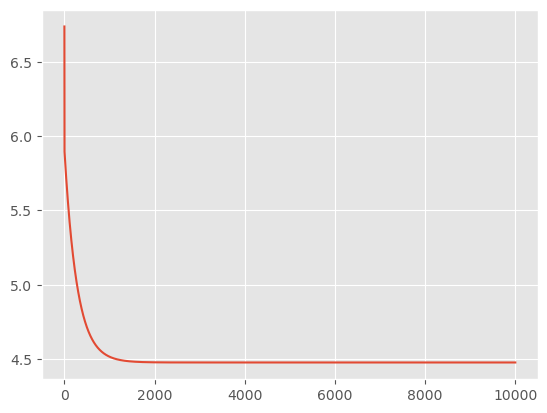

In [12]:
plt.plot(range(iterations), j_hist)

### Inference Using Our Optimized Model:

In [13]:
# Creating a basic prediction function:
profit_func = lambda population: w_final * population + b_final 

In [14]:
population = 13.21
profit = profit_func(population)

print(f'Given a population of {population} million people, the model predicts a profit of {profit:.2f} million dollars')

Given a population of 13.21 million people, the model predicts a profit of 11.86 million dollars


### Notes & Tips:

* You can play around with the learning rate to see what happens when it is too high or too low. Examine the output of the gradient descent algorithm and see the convergence curve.

* The optional labs in the course have many great visualizations and interactive plots, so go there to see more, for I didn't do everything in between as I am not teaching, just implementing.

* I didn't prettify the plots since this is just for me, but I can always put the titles and the labels later.

* All of this can be done with three lines of code using machine learning libraries, but I am implementing it from the ground up for learning purpuses, so none of this is ever used in practice, and that's another reason why I didn't focus on producing great graphs and so on.

## **Week Two| Regression With Multiple Input Variables**
This week, you'll extend linear regression to handle multiple input features. You'll also learn some methods for improving your model's training and performance, such as vectorization, feature scaling, feature engineering and polynomial regression. At the end of the week, you'll get to practice implementing linear regression in code.

**Learning Objectives:**
* Use vectorization to implement multiple linear regression
* Use feature scaling, feature engineering, and polynomial regression to improve model training
* Implement linear regression in code

## **Multiple Linear Regression**
**Videos:**
The videos expanded on the concept of linear regression and gradient descent to the general situation where you have multiple features to get information from. The videos first covered vectorization, which is a way of doing computations in a manner that the CPU or GPU applies parralel computing to speed up the computaions, and also the code is much shorter when this method is used. The optional labs were great, as always. The first one is good resource for the relevant numpy used in this cource, and an example of the time difference when employing the vectorization vs the for loop implementation were shown.

**Quizes:**
Very straight forward three conceptual questions quiz.

* Note that there is no need for me to reimplement what I just did earlier(simple linear regressio from scratch) because there isn't much of a difference. The methodology remains exactly the same, but the extra thing to take care of is when applying the gradient descent algorith, you need a new for loop to take the new features into account. Also, everything is in the optional labs, so if I ever need to revisit the concepts, I should go there.

## **Gradient Descent In practice**
**Videos:**
The videos first covered feature scaling, then choosing the learning rate, and then feature engineering and finally polynomial regression. There were two practical labs that the first coverd non-linear regression using linear regression after engineering the features. The second lab were about sklearn, and how we do linear regression in practice. This week is mostly practical. The assignment for this week was what I have already coded in the first week.

**Quizes:**
Very straight forward, mostly conceptual, quiz.

## **CS299 | Stanford University**
I will be studying <a href="https://www.youtube.com/watch?v=jGwO_UgTS7I&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU">this cource</a> from stanford alongside this specialization to get a better feel for the theory.
### **Lecture One:**
In this lecture, the focus was to introduce the subject and give a general feel of machine learning. Nothing new.
### **Lecture Two:**
This lecture covered linear regression, and following are he notes:
* Batch gradient descent computes the sum each time the loop is executed, and that takes too much time if the dataset is large.
* Stochastic gradient descent solves the problem above.
* In practice, the libraries implementing linear regression use the normal equation, which computes the exact parameters in one step compared to the gradient descent which optimizes the parameters with iterarions.
* The gradient descent is used in many learning algorithms not just linear regression.
* New vector notation was covered.

**I will be commenting on all the lectures here, but not at the same time. Therefore, I will be getting back here every once in a while.**
### **Lecture Three:**
The following is 7/1/2023 notes:
* The locally weighted linear regression is used when you don't know what features to use because this method weighs every feature proportionately to where you want to locally evaluate.
* This lecture covered the mathematical derivations of the methods learned before.
* There is no normal equation for logistic regression or anything similar, so we have to use algorithms.
* The newoton's algorithm were covered, and it converges smuch faster than the gradient descent when the parameters are a few, but it is slower when the parameter number is large because of the computaion of the inverse of the hessian.

## **Week Three | Classification**
This week, you'll learn the other type of supervised learning, classification. You'll learn how to predict categories using the logistic regression model. You'll learn about the problem of overfitting, and how to handle this problem with a method called regularization. You'll get to practice implementing logistic regression with regularization at the end of this week!

**Learning Objectives:**
* Use logistic regression for binary classification
* Implement logistic regression for binary classification
* Address overfitting using regularization, to improve model performance

## **Classification With Logistic Regression**
**Videos:**
The videos first covered the motivation behind logistic regression, and then tried to solve the classification problem using regular linear regresssion, and showed how it fails to do that when outliers are present bdecause the decesion boundry is very susseptple to ouitliers. Then, the videos cobered the sigmoid function and , then the logistic regression using the sigmoid function, and then covered the decision bounsdry. There were three labs, and all of themj had great conceptual demos.

**Quizes:**
Very straight forward, mostly conceptual, quiz.

## **Cost Function With Logistic Regression**
**Videos:**
The videos covered the problem of determining a cost function to optimize the logistic regression problem, and the resuting cost function turned out to be convex, so the gradient descent is easily applied to it. The practice labs gave great intuition as always. Below is the code for coomputing the cost function in code:

**Quizes:**
Very straight forward, mostly conceptual, quiz.

In [15]:
# Computing the cost function:
def compute_cost_logistic(x,y,w,b):
    ''' This function computes the cost function of the logistic regression algorithm,
        Args:
        x: The training set
        y: The target set
        w: Parameter
        b: Parameter
        '''
    m = x.shape[0]
    cost = 0.0
    
    for i in range(m):
        z = np.dot(x[i],w) + b
        f_wb = 1 / (1 + np.exp(-z))
        cost +=  -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    cost = cost / m
    return cost

Check the implementation of the cost function using the two cells below:

In [16]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

In [17]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


## **Gradient Descent For Logistic Regression**
**Videos:**
The videos covered how to apply the gradient descent algorithm to logistic regression proplems in order to minimize the cost function, and the labs shoed how to do that in code, one with basic python and numpy, and the other with sklearn. Below is the coded algorithm from the ground up, and I will do some projects using sklearn later in a seperate notebook. Note that the first lab has a great visualization demo in its end.

**Quizes:**
Very straight forward, mostly conceptual, quiz.

In [18]:
def compute_gradient_logistic(x,y,w,b):
    ''' Computes the gradients for the logistic regression
        
        Args:
        x (ndarray(m,n)) : the training set with m examples and n features
        y (ndarray(m,)) : the target set with m examples
        w (ndarray(n,) : model parameter
        b (scaler) : model parameter
        
        Returns:
        dj_dw (ndarray(n,)) : the gradient of j w.r.t w
        df_db (scaler) : the gradient of j w.r.t b
        '''
    m = x.shape[0]
    n = x.shape[1]
    
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    
    for i in range(m):
        z = np.dot(x[i],w) + b
        f_wb = 1 / (1 + np.exp(-z))
        dj_db += f_wb - y[i]
        
        for j in range(n):
            dj_dw[j] += (f_wb - y[i]) * x[i,j]
            
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m 
    
    return dj_db, dj_dw  

Check the implementation of the gradient function using the cell below.

In [19]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [20]:
# Computing the gradient descent:
import copy
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing


Let's run gradient descent on our data set.

In [21]:
import math
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


## **The Problem Of Overfitting**
**Videos:**
The videos covered the problem of overfitting and how to solve it using the three main methods to do so:
1. Add more data
2. feature selection
3. regularication

The videos and the labs focused mainly on regularization since it is the most practical for you are mostly given a static set of data for example. The first lab had a great demo for the intuition behind the problem of overfitting.

**Quizes:**
Very straight forward, mostly conceptual, quiz.

# **Course Two | Advanced Learning Algorithms**
---
Place holder

## **Week One | Neural Networks**
This week, you'll learn about neural networks and how to use them for classification tasks. You'll use the TensorFlow framework to build a neural network with just a few lines of code. Then, dive deeper by learning how to code up your own neural network in Python, "from scratch". Optionally, you can learn more about how neural network computations are implemented efficiently using parallel processing (vectorization).

**Learning Objectives:**
* Get familiar with the diagram and components of a neural network
* Understand the concept of a "layer" in a neural network
* Understand how neural networks learn new features.
* Understand how activations are calculated at each layer.
* Learn how a neural network can perform classification on an image.
* Use a framework, TensorFlow, to build a neural network for classification of an image.
* Learn how data goes into and out of a neural network layer in TensorFlow
* Build a neural network in regular Python code (from scratch) to make predictions.
* (Optional): Learn how neural networks use parallel processing (vectorization) to make computations faster.

* Note That this couse segments the weeks into many very small sections. Therefore, I will write the notes of the week as a whole.

* This week first gave the intuition behind neural networks, and then proceeded to cover its implementation first in tensoflow, and then from scracth using numpy. Then, the concept of AGI was covered, and then vectorization was covered as an optional ad on. Following is the code summarizing all of what was covered:

<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2023-01-19 07:20:13.481199: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 07:20:13.637384: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-19 07:20:13.637416: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-19 07:20:14.280758: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

<a name="2"></a>
## 2 - Neural Networks

In Course 1, you implemented logistic regression. This was extended to handle non-linear boundaries using polynomial regression. For even more complex scenarios such as image recognition, neural networks are preferred.

<a name="2.1"></a>
### 2.1 Problem Statement

In this exercise, you will use a neural network to recognize two handwritten digits, zero and one. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. You will extend this network to recognize all 10 digits (0-9) in a future assignment. 

This exercise will show you how the methods you have learned can be used for this classification task.

<a name="2.2"></a>
### 2.2 Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 1000 training examples of handwritten digits $^1$, here limited to zero and one.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training example becomes a single row in our data matrix `X`. 
        - This gives us a 1000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 1000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 1` if the image is of the digit `1`.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [50]:
# Load the dataset:
# Note that I found the 5000 with all the digits dataset, and here I cut it as follows:
X = np.load('../../Datasets/Mnist5000/X.npy')
y = np.load('../../Datasets/Mnist5000/y.npy')

In [51]:
X.shape # The original shape of the data

(5000, 400)

In [25]:
y.shape

(5000, 1)

In [52]:
# Cutting The Data:
index=[]
for i in range(y.shape[0]):
    if y[i][0] == 0:
        index.append(i)
    elif y[i][0] == 1:
        index.append(i)
        
y = y[index]
X = X[index]

In [53]:
X.shape   # The shape of the data using only zeros and ones as digits:

(1000, 400)

<a name="toc_89367_2.2.1"></a>
#### 2.2.1 View the variables
Let's get more familiar with your dataset.  
- A good place to start is to print out each variable and see what it contains.

The code below prints elements of the variables `X` and `y`.  

In [28]:
print('The first element of X is: ', X[0]) # uncomment to see it. Did it because it takes too much space

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [29]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  1


<a name="toc_89367_2.2.2"></a>
#### 2.2.2 Check the dimensions of your variables

Another way to get familiar with your data is to view its dimensions. Please print the shape of `X` and `y` and see how many training examples you have in your dataset.

* Already did it.

<a name="toc_89367_2.2.3"></a>
#### 2.2.3 Visualizing the Data

You will begin by visualizing a subset of the training set. 
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

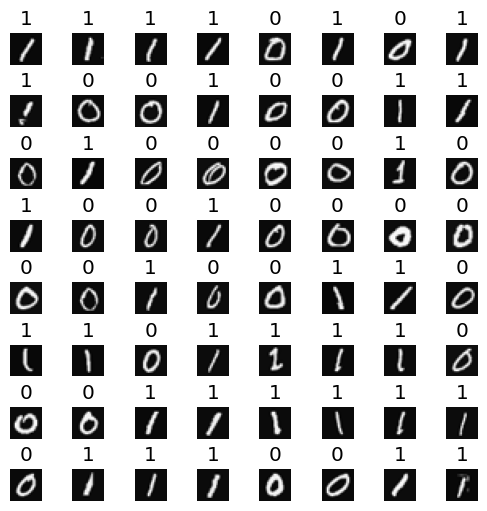

In [30]:
m,n = X.shape

fig, ax = plt.subplots(8,8,figsize=(5,5))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(ax.flat):
    rand = np.random.randint(m)
    
    ax.imshow(X[rand].reshape(20,20).T, cmap='gray')
    ax.set_title(y[rand][0])
    ax.set_axis_off()

<a name="2.3"></a>
### 2.3 Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has three dense layers with sigmoid activations.
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
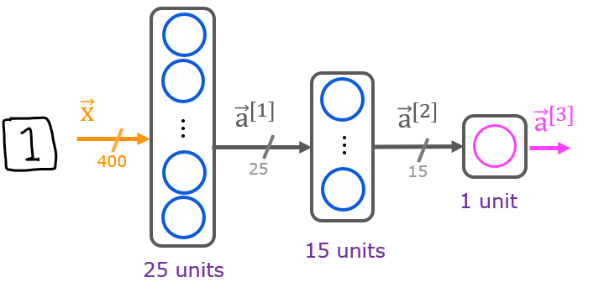

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3. 

    - Recall that the dimensions of these parameters are determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (1,n) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention. 
               

<a name="2.4"></a>
### 2.4 Tensorflow Model Implementation
Tensorflow models are built layer by layer. A layer's input dimensions ($s_{in}$ above) are calculated for you. You specify a layer's *output dimensions* and this determines the next layer's input dimension. The input dimension of the first layer is derived from the size of the input data specified in the `model.fit` statement below. 
>**Note:** It is also possible to add an input layer that specifies the input dimension of the first layer. For example:  
`tf.keras.Input(shape=(400,)),    #specify input shape`  
We will include that here to illuminate some model sizing.

Below, using Keras [Sequential model](https://keras.io/guides/sequential_model/) and [Dense Layer](https://keras.io/api/layers/core_layers/dense/) with a sigmoid activation to construct the network described above.

In [31]:
model = tf.keras.models.Sequential([
                                    tf.keras.Input(shape=(400,)),
                                    tf.keras.layers.Dense(units=25, activation='sigmoid'),
                                    tf.keras.layers.Dense(units=15, activation='sigmoid'),
                                    tf.keras.layers.Dense(units=1, activation='sigmoid'),
                                    ], name='my_model')


2023-01-19 07:20:17.246000: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-19 07:20:17.246059: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-19 07:20:17.246089: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hashem-Latitude-E6540): /proc/driver/nvidia/version does not exist
2023-01-19 07:20:17.246451: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [33]:
[layer1, layer2, layer3] = model.layers

In [34]:
w1,b1 = layer1.get_weights()
w2,b2 = layer2.get_weights()
w3,b3 = layer3.get_weights()

print(f'W1 shape = {w1.shape}, b1 shape = {b1.shape}') 
print(f'W1 shape = {w2.shape}, b1 shape = {b2.shape}') 
print(f'W1 shape = {w3.shape}, b1 shape = {b3.shape}') 

W1 shape = (400, 25), b1 shape = (25,)
W1 shape = (25, 15), b1 shape = (15,)
W1 shape = (15, 1), b1 shape = (1,)


The following code will define a loss function and run gradient descent to fit the weights of the model to the training data. This will be explained in more detail in the following week.

In [35]:
X.shape

(1000, 400)

In [36]:
y.shape

(1000, 1)

In [37]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6459
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5066
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3707
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2651
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1938
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1472
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1165
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0953
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0799
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0682
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0524
Epoch 13/20
32/32 [==============================

Making Predictions:

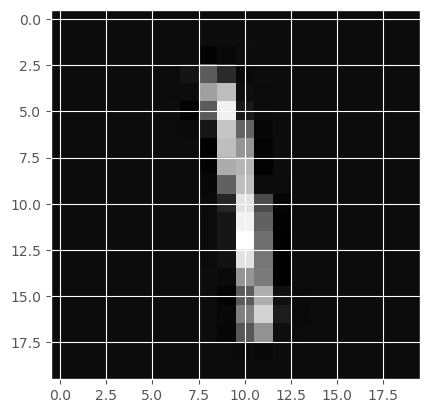

In [38]:
plt.imshow(X[700].reshape(20,20).T, cmap='gray')

In [39]:
prediction= model.predict(X[700].reshape(1,400))
prediction

1/1 [==============================] - 0s 74ms/step


array([[0.9689358]], dtype=float32)

In [40]:
if prediction >= 0.5:
    yhat=1
else:
    yhat=0
print(f'The prediction is {yhat}')

The prediction is 1


Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

1/1 [==============================] - 0s 16ms/step


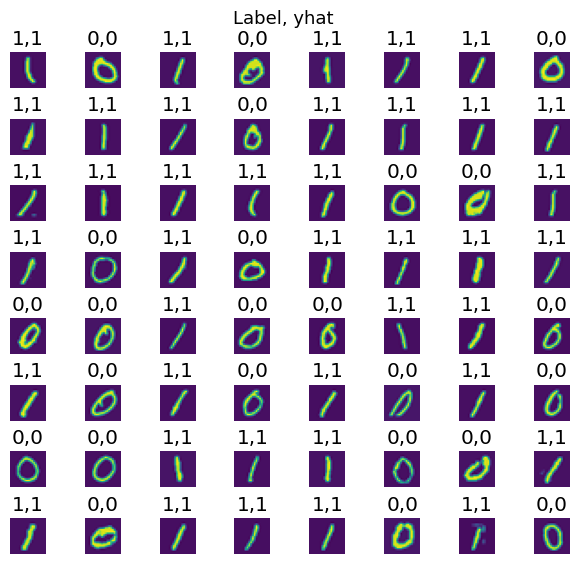

In [41]:
fig, ax = plt.subplots(8,8, figsize=(6,6))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92])
m,n = X.shape

for i, ax in enumerate(ax.flat):
    rand = np.random.randint(m)
    
    prediction = model.predict(X[rand].reshape(1,400))
    if prediction >= 0.5:
        yhat=1
    else:
        yhat=0
    
    ax.imshow(X[rand].reshape(20,20).T)
    true = y[rand][0]
    ax.set_title(f'{true},{yhat}')
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=13);

<a name="2.5"></a>
### 2.5 NumPy Model Implementation (Forward Prop in NumPy)
As described in lecture, it is possible to build your own dense layer using NumPy. This can then be utilized to build a multi-layer neural network. 
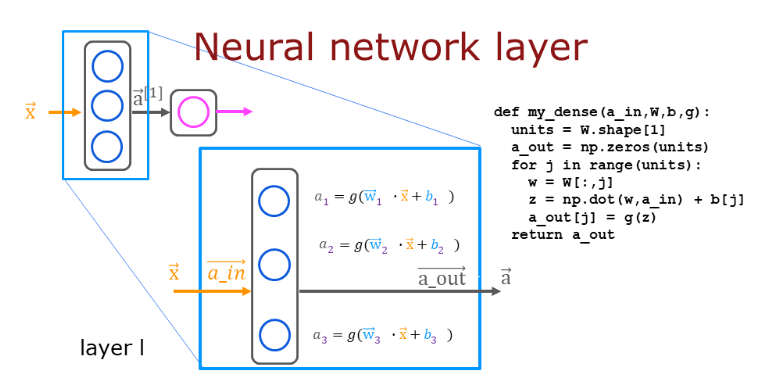

* **Check the labs to see how it is applied using numpy from scratch. I decided not to write it here for it isn't used in practice, and the labs are sufficient for learning**.

## **Week Two | Neural Network Training**
This week, you'll learn how to train your model in TensorFlow, and also learn about other important activation functions (besides the sigmoid function), and where to use each type in a neural network. You'll also learn how to go beyond binary classification to multiclass classification (3 or more categories). Multiclass classification will introduce you to a new activation function and a new loss function. Optionally, you can also learn about the difference between multiclass classification and multi-label classification. You'll learn about the Adam optimizer, and why it's an improvement upon regular gradient descent for neural network training. Finally, you will get a brief introduction to other layer types besides the one you've seen thus far.

**Learning Objectives:**
* Train a neural network on data using TensorFlow
* Understand the difference between various activation functions (sigmoid, ReLU, and linear)
* Understand which activation functions to use for which type of layer
* Understand why we need non-linear activation functions
* Understand multiclass classification
* Calculate the softmax activation for implementing multiclass classification
* Use the categorical cross entropy loss function for multiclass classification
* Use the recommended method for implementing multiclass classification in code
* (Optional): Explain the difference between multi-label and multiclass classification

This week extended the problem to multiclass classification where we classify all the 10 digits, and this weeek covered a lot while doing so. Following are the covered topics:
* Softmax
* Computaional graphs
* Different activation functions
* Adam optimizer

__Following is the code that extends the proplem:__

In [42]:
X = np.load('../../Datasets/Mnist5000/X.npy')
y = np.load('../../Datasets/Mnist5000/y.npy')

Visualizing the data:

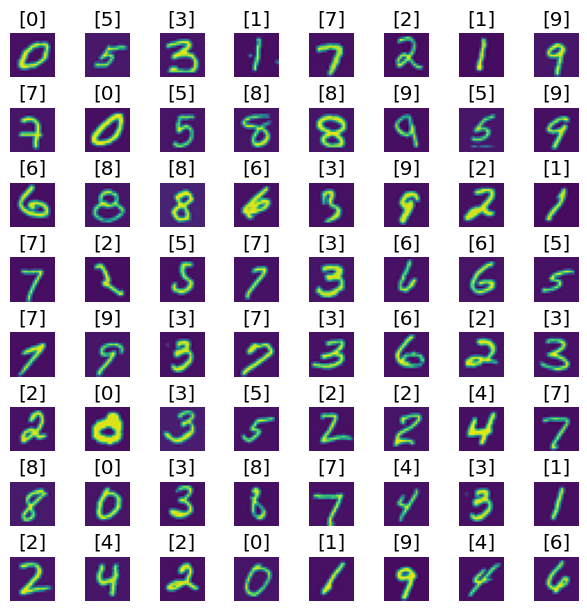

In [43]:
fig, ax = plt.subplots(8,8, figsize=(6,6))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(ax.flat):
    index = np.random.randint(X.shape[0])
    ax.imshow(X[index].reshape(20,20).T)
    ax.set_title(str(y[index]))
    ax.set_axis_off()

Creating the model:

In [44]:
model = tf.keras.Sequential([
                            tf.keras.layers.Input(shape=(400,)),
                            tf.keras.layers.Dense(units=25, activation='relu'),
                            tf.keras.layers.Dense(units=15, activation='relu'),
                            tf.keras.layers.Dense(units=10, activation='linear')
                            ],
                            name='my_model'
                            )

In [45]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                10025     
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.Adam(0.001))

In [47]:
model.fit(X,y, epochs=40)

Epoch 1/40
157/157 [==============================] - 1s 2ms/step - loss: 1.6044
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.6550
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.4298
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3545
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3046
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2705
Epoch 7/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2445
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2288
Epoch 9/40
157/157 [==============================] - 0s 3ms/step - loss: 0.2092
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1980
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1810
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1751
Epoch 13/40
157/157 [====

Testing The model:

1/1 [==============================] - 0s 17ms/step


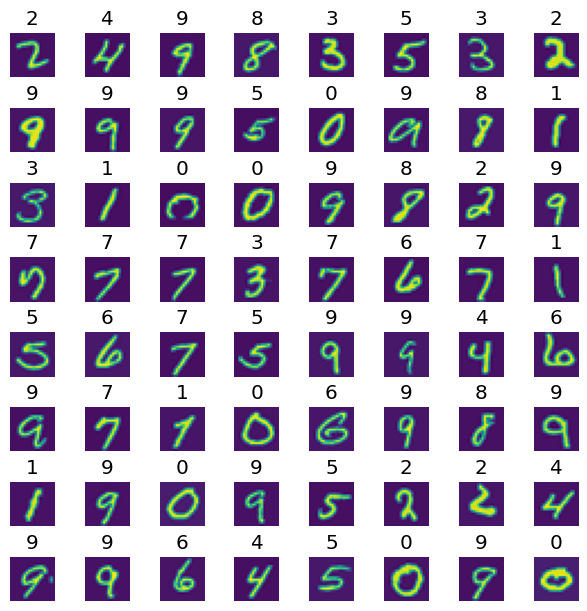

In [48]:
fig, ax = plt.subplots(8,8, figsize=(6,6))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(ax.flat):
    index = np.random.randint(X.shape[0])
    ax.imshow(X[index].reshape(20,20).T)
    prediction = model.predict(X[index].reshape(1,400))
    ax.set_title(prediction.argmax())
    ax.set_axis_off()